## Building A Neural Network From Scratch (15 Marks):
In this assignment, you will build a neural network from scratch using NumPy. You will implement functions to build a neural network with as many layers as you want. You will also use this neural network to build a classifier for the [Credit Approval Dataset](https://archive.ics.uci.edu/ml/datasets/credit+approval) after performing data cleaning and preprocessing tasks yourself.
<center><img src="credit-approval-rubber-stamp.jpg" width="180" height="180"></center>
So, let's get started!

### Overview of the Assignment:
The assignment asks you to complete several functions, with each function guiding you through the necessary steps to complete it. You will:
1. Preprocess the Credit Approval Dataset (like fill in missing values, split into test and train sets, etc).
2. Implement various activation functions taught in class.
3. Initialize the weight matrices and bias vectors of the neural network depending on its architecture.
4. Implement the forward propagation module.
5. Compute cross entropy loss function.
6. Implement the backward propagation module to compute gradients of loss function w.r.t. weights of the network.
7. With the help of batch gradient descent optimizer, update the weights of the neural network using gradients computed in the previous step.
8. Repeat steps 3-6 for several epochs to train the neural network on Credit Approval Dataset.
9. Report the accuracy of the neural network on test data.

### Terminologies used for describing the computations of the Neural Network:
* Superscript $[h]$ denotes a quantity associated with the $h^{th}$ layer. 
    - Example: $a^{[h]}$ is the $h^{th}$ layer activation. $W^{[h]}$ and $b^{[h]}$ are the $h^{th}$ layer parameters.
* Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $y^{(i)}$ is the ground truth label corresponding to the $i^{th}$ training example.

<center><img src="neural_network_diagram.jpg" width="512" height="200"></center>

* A layer of the neural network consists of:
    - a weight matrix $W^{[h]}$of shape (size of current layer, size of previous layer)
    - a bias vector $b^{[h]} $of shape (size of current layer, 1)
    - an activation function $ g^{[h]} $
* Computation in a layer $h$ of the neural network can be described as follows:
  - Let $A^{[h-1]}$ be the activations of the previous layer or input data (if current layer is first hidden layer), of shape (size of previous layer, number of examples).
  - Let $ Z^{[h]} $ be the pre-activation value. Then, $ Z^{[h]} $ is computed as :
  $$ Z^{[h]} = W^{[h]}.A^{[h-1]}+b^{[h]}$$
  where $ . $ denotes matrix multiplication.
  So, $Z^{[h]}$ will be of shape (size of current layer, number of examples).
  - Let $A^{[h]}$ denote post activation value. It is computed as:
  $$ A^{[h]} = g^{[h]}(Z^{[h]}) $$
  Note that shape of $A^{[h]}$ is same as that of $Z^{[h]}$.
  - Above, $h$ is an integer in the range $[1, H]$. $h=H$ denotes the output layer, while $h<H$ denotes a hidden layer.
  - Also note that $A^{[0]}$ is nothing but $X$, the input data.
* If you wish to learn about neural networks from scratch, you can watch the videos 43 to 57 (as per your convenience/requirement) from this [Youtube playlist](https://www.youtube.com/playlist?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN).

### Neural Network Architecture Implementation Details:
* The neural network you will build will consist of $H$ layers in total (excluding the input layer). It will have ($H-1$) hidden layers  and an output layer. 
* The list ```layers_sizes``` (of length $H+1$) contains sizes of input layer (at index $0$), hidden layers (from index $1$ to $H-1$) and output layer (at index $H$). 
* The list ```activations``` (of length H) is list of strings, representing the activation functions used in the hidden layers and the output layer. Since the Credit Approval Dataset is a classification task, the string at index $H-1$ will always be "sigmoid". 
* The weights of the neural network will be stored in a list ```weights``` (of length $H$), where each element is a list - $[W^{[h]}, b^{[h]}]$, representing the  weights matrix and bias vector of layer $h$ (Both $W^{[h]}$ and  $b^{[h]}$ are numpy arrays).
* You will notice that there is a backward function corresponding to each forward function. So, it is essential to store some important values computed in the forward pass that will be useful in the backward pass for computing gradients. A list ```layers_cache``` (of length $H$) is used for this purpose and its details will be described later.


### What You Have To Do?
* The assignment is divided into 11 sections, out of which you only need to complete the sections 2 to 8.
* You will have to complete certain portions of certain functions. Write your code at the comment ```# YOUR CODE HERE``` and remove or comment out the line ```raise NotImplementedError()```. The functions will clearly specify what your code should do. 
* Do not change the type of any cell and do not create any extra cells in your final submission.
* The maximum marks for this assignment are 15 marks. The marks for each function and each section are specified above them. Except at one place in section 2, you will be awarded marks for passing the hidden test-cases and not the sample test-cases.
* As evident from the design of sample  test-cases, we have tried to keep the evaluation of each section independent from the other sections as far as possible, so that you get marks proportional to the sections you have implemented.
* We have provided you with all the necessary files so that you don't need to download any file.
* For any clarifications regarding section 2 (Load, Preprocess and Split the Credit Approval Dataset), contact Abhilash Neog (f2016004@pilani.bits-pilani.ac.in). For queries regarding rest of the sections, contact Parth Patel (f2016150@pilani.bits-pilani.ac.in).

### 1- Import Packages:
**DO NOT** import any package from your side.

In [1]:
# do not change code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
pd.set_option('chained_assignment',None)

### 2- Load, Preprocess and Split the Credit Approval Dataset (4.5 Marks):

The dataset that we are going to work upon is the [Credit Approval Dataset](https://archive.ics.uci.edu/ml/datasets/credit+approval) . The dataset contains credit card application information. Each attribute provides certain information about an applicant's data. The classification task to perform is, given all the information of an applicant, predict whether his application would be approved or not. But, before the classification task is performed, it is necessary that the data is clean and in the right format to feed into the neural network classifier.<br>
**Dataset Description**
The dataset contains 690 instances with 11 attributes + class/label attribute, whose types are mentioned below:<br>
- A1 - nominal
- A2 - continuous (real)
- A3 - continuous (real)
- A4 - nominal
- A5 - nominal
- A6 - nominal
- A7 - nominal
- A8 - continuous (real)
- A9 - nominal
- A10 - continuous (integer)
- A11 - continuous (integer)
- A12 - nominal - Class attribute (+/-)

*There are certain number of missing values in the dataset, which you need to fill, based on some given conditions.*

#### 2.1 Loading the dataset (0.75 Mark)

**The tasks to be performed:**<br>
  Load the dataset and answer a few queries:
- Read the csv (0.25 Mark)
- Query 1: find the range/difference between 3rd highest and 3rd lowest attribute value of an attribute(0.25 Mark)
- Query 2: find the average value of a given attribute (with 2 decimal places only) (0.25 Mark)

*Hint: Pandas has a wide range of pre-defined library functions. Knowing a few would be really helpful to complete below functions easily.*

In [2]:
### 0.25 Mark
def load_dataset(filename):
    
    col_name = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']
    return pd.read_csv(filename, names=col_name)

In [3]:
# do not change code here
### SAMPLE TEST CASE
# This is the only sample test case that fetches you marks.
# 0.25 marks for passing this sample test case.
print("Running sample test case")
data = load_dataset("crxData.csv")
assert np.allclose(data.shape, (690,12), atol = 1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [4]:
### 0.25 Mark    
def getRange(col):
    """
    Input: col is a pandas series object corresponding to a certain column
    Output: return the difference between 3rd highest and 3rd lowest value of col (NOT THE ABSOLUTE VALUE). Round to 2 decimal
            places
    """
    return round(col.nlargest(3).iloc[-1]-col.nsmallest(3).iloc[-1],2)

In [5]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
diff = 25.21
assert np.allclose(diff, getRange(data['A3']), atol = 1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [6]:
# do not change code here
# Hidden Test cases

In [7]:
### 0.25 Mark
def avgprice(col):
    """
    Input: col is a pandas series object corresponding to a certain column
    Output: return the average of all the values in that attribute to 2 decimal places
    """
    return round(col.sum()/len(col),2)

In [8]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
avg = 4.76
assert np.allclose(avg, avgprice(data['A3']), atol = 1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [9]:
# do not change code here
# Hidden Test cases

#### 2.2 Filling the missing values (2.75 Marks)

**The tasks to be performed:**<br>

- For every categorical attribute, replace '?' with the most common string in the neighbourhood (1 Mark)
- For every real-valued attribute, replace '?' with the mean of the values in that column (1 Mark)
- For every integer-valued attribute, replace '?' with the min value in that column (0.75 Mark)

*Explanation for filling categorical attributes:* <br>

 Find the most common string in the column - cmn_str (say)<br>
 For every missing value '?', check its previous and next value in the original column (passed as input to the fillCATEGORICAL() function):
 - if previous does not exist (meaning first index): fill it with the next value (only if next is not '?', else fill with cmn_str)
 - if next does not exist (meaning last index): fill it with previous value (only if previous is not '?', else fill with cmn_str)
 - if both exist: fill it with next value (only if next is not '?', else fill with previous value(only if it is not '?', else cmn_str))<br>  
 See the example provided below in comments for more details.
 
*Hint: [Pandas series mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mode.html#pandas.Series.mode) might be useful*
 
**Note:** Due to the presence of '?', the attribute values are treated as string values. It's important to convert the values into numeric type for mean and min calculation

In [10]:
### 1 Mark
def fillCATEGORICAL(column):
    """
    Input: 'column' is a pandas series object representing an attribute column in the dataset
    Output:  return the modified column (series object) after filling in the missing values with the above procedure
    Approach: Get the indices of missing values (brute force is fine), then scan around those locations.
              Eg. column is [?,?,alp,alp,mod,alp,beta,?,?,?,mod,alp,beta,alp,alp,alp,alp,?,?],
                  alp is the most common string,
                  output should be - [alp,alp,alp,alp,mod,alp,beta,beta,alp,mod,mod,alp,beta,alp,alp,alp,alp,alp,alp]
    Note: Assume that the number of missing values is always less than the most common string
    """
    # ind = []
    # ABOVE VARIABLE IS NOT MANDATORY TO USE
    most_cmn_string= column.mode().iloc[0]
    if(column[0]=='?'):
            if(column[1]=='?'):
                column[0]=most_cmn_string
            else:
                column[0]=column[1]
    if(column[len(column)-1]=='?'):
            if(column[len(column)-2]=='?'):
                column[len(column)-1]=most_cmn_string
            else:
                column[len(column)-1]=column[len(column)-2]
    for i in range(1,len(column)-1,1):
        if(column[i]=='?'):
            if(column[i+1]!='?'):
                column[i]=column[i+1]
            elif(column[i-1]!='?'):
                column[i]=column[i-1]
            else:
                column[i]=most_cmn_string
            

    return column

In [11]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
import copy
dataC = data.copy(deep=True)
dataN = data.copy(deep=True)
dataR = data.copy(deep=True)

dataC['A1'] = fillCATEGORICAL(dataC['A1'])
dataC['A4'] = fillCATEGORICAL(dataC['A4'])
dataC['A5'] = fillCATEGORICAL(dataC['A5'])
dataC['A6'] = fillCATEGORICAL(dataC['A6'])
dataC['A7'] = fillCATEGORICAL(dataC['A7'])

# assert dataC.equals(pd.read_pickle('categorical_credits.p'))
pd.testing.assert_frame_equal(dataC, pd.read_pickle('categorical_credits.p'))
print("Sample test case passed")

Running sample test case
Sample test case passed


In [12]:
# do not change code here
# Hidden Test cases

In [13]:
### 1 Mark
def fillREAL(column):
    """
    Input: 'column' is a pandas series object representing an attribute column in the dataset
    Output: return the modified column (series object) after filling in the missing values with the mean of that column.
            The mean should be calculated ignoring the presence of '?' and it should be rounded off to 2 decimal places
            The return data type of the series should be float64
    """
    
    tsum=0
    i =0
    count=0
    for i in range(0,len(column),1):
        
        if(column[i]!="?"):
            count=count+1
            tsum = tsum + float(column[i])
    mean= round(tsum/count,2)
    
    for i in range(0,len(column),1):
        
        if(column[i]=="?"):
            column[i]=mean
 
    return column.astype('float64')
    
    
  
 
    

In [14]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
dataR['A2'] = fillREAL(dataR['A2'])
# assert dataR.equals(pd.read_pickle('real_credits.p'))
pd.testing.assert_frame_equal(dataR, pd.read_pickle('real_credits.p'))
print("Sample test case passed")

Running sample test case
Sample test case passed


In [15]:
# do not change code here
# Hidden Test cases

In [16]:
### 0.75 Mark
def fillINT(column):
    """
    Input: 'column' is a pandas series object representing an attribute column in the dataset
    Output: return the modified column (series object) after filling in the missing values with the minimum value 
            of that column. The return type should be int32
    """
    # ind = []
    # minVal = 100000000
    # ABOVE VARIABLES ARE NOT MANDATORY TO USE
    for i in range(0,len(column),1):    
        if(column[i]=="?"):
            column[i]=column.min()
    return  column.astype('int32')

In [17]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
dataN['A10'] = fillINT(dataN['A10'])
# assert dataN.equals(pd.read_pickle('numeric_credits.p'))
pd.testing.assert_frame_equal(dataN, pd.read_pickle('numeric_credits.p'))
print("Sample test case passed")

Running sample test case
Sample test case passed


In [18]:
# do not change code here
# Hidden Test cases

#### 2.3  Final Preprocessing and Data split(1 Mark)

**The tasks to be performed:**<br>

- Encode the categorical attributes (0.25 Mark)
- Scale the data to the range [0-1] (0.25 Mark)
- Split the dataset into training and testing as per the given instructions (0.50 Mark) 

##### Encode the categorical attributes:

In [19]:
# do not change code here
def labelEncode(col):
    """
    function takes a series object (column of a dataframe) as an input and outputs an label encoded series object
    """
    return LabelEncoder().fit_transform(col)

In [20]:
### 0.25 Mark
def encode_dataset(dat):
    """
    Input: dat is the dataframe whose attributes need to be encoded. Shape of dat - (no of instances, no of attr)
    
    Output: return the encoded dataframe with the same shape
    
    Approach: Loop through the attributes of dataframe. Check every attribute type - if its categorical/string encode that
              column.
    """
    for cols in dat.columns:
        
        if(dat[cols].dtype==np.object):
            if(dat[cols].str.contains('?', regex=False).any()):
                if(not dat[cols].str.isnumeric().any()):
                    dat[cols]=labelEncode(dat[cols])               
            else:
                dat[cols]=labelEncode(dat[cols])           
    return dat
  

In [21]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
encoded_data = encode_dataset(dataC)
assert encoded_data.equals(pd.read_pickle('categorical_encode.p'))
print("Sample test case passed")

Running sample test case
Sample test case passed


In [22]:
# do not change code here
# Hidden Test cases

##### Assembling all the preprocessing steps

Before moving onto scaling the dataset in the specified range, it is important that the data fed into scaler have all missing values filled and attributes encoded. The below preprocess() does the same. It calls all the operations performed above on the original dataset and produces a dataframe suitable to be fed into the scaler<br>
*You are not required to make any changes/edits to this function*

In [23]:
# do not change code here
def preprocess(dat):
    
    dat2 = dat.copy(deep=True)
    
    # calling categorical fill for cols A1, A4, A5, A6, A7
    catfill = ['A1','A4','A5','A6','A7']
    for col in catfill:
        dat2[col] = fillCATEGORICAL(dat2[col])
    
    # calling Real fill for cols A2
    dat2['A2'] = fillREAL(dat2['A2'])
    
    # calling Int fill for col A10 
    dat2['A10'] = fillINT(dat2['A10'])
    
    # encode the dataset
    enc_data = encode_dataset(dat2)
    
    return enc_data

##### Scale the data to the range [0-1]:
**Note:** Use [min-max scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for scaling the data

In [24]:
### 0.25 Mark. 
def scaler(df,colname):
    """
    Input: df is a dataframe of shape (number of instances,number of attributes)
           colname is the list of attribute names of the dataframe
    
    Output: return a DataFrame, with the data being scaled in the range 0-1. The scaled data values should be rounded off
            to 2 decimal places
    
    Approach: create a scaler object and apply it on the input, by calling its pre-defined function (fit_transform())
    """
    scaler=MinMaxScaler()
    df[colname]=scaler.fit_transform(df[colname]).round(2)
    
    return df
   

In [25]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
processed_data = preprocess(data)
colnames = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']
scaled_data = scaler(processed_data,colnames)
assert scaled_data.equals(pd.read_pickle('data_normalized.p'))
print("Sample test case passed")

Running sample test case
Sample test case passed


In [26]:
# do not change code here
# Hidden Test cases

##### Train and Test split:

The dataset needs to be split into testing and training data. We won't perform any random subsampling, instead divide the dataset into different groups and merge them into TRAIN AND TEST SET<br>

**Divide the dataset into 4 groups:**<br>
Group 1 LOWLIMIT[0] - HILIMIT[0] <br>
Group 2 LOWLIMIT[1] - HILIMIT[1] <br>
Group 3 LOWLIMIT[2] - HILIMIT[2] <br>
Group 4 LOWLIMIT[3] - HILIMIT[3] <br>

LOWLIMIT and HILIMIT are 2 lists which store the row/instance number of the dataset. <br>
If HILIMIT:[99, 399, 599, 690], LOLIMIT:[0, 100, 400, 600]. <br>
    Group 1 will be formed from rows starting from 0 till 99 (i.e. from 0th row to 99th row of dataframe)<br>
    Group 2 will be formed from rows starting from 100 till 399 and so on <br>

**After the division, create the train and test set in the following way:**
 - Train dataset - Stack 1st and 3rd group
 - Test dataset - Stack 2nd and 4th group<br><br>
**Note:** The last column contains the labels of the dataset <br>
Hint: Few functions which might be useful: [pandas concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html), [pandas to numpy (for pandas version >= 0.24.0)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html) / [pandas values (for pandas version < 0.24.0)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html) and [numpy transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html)

In [27]:
### 0.5 Mark
def train_and_test_split(data,lolimit,hilimit):
    """
    Complete the function using the logic described above
    
    Input: input 'df' is a dataframe of shape (no of instances, no of attr) representing the dataset
    
    Output: Output 4 numpy 2D arrays trainX, trainY, testX, testY of shape:
            trainX,testX : (no of attr/features, no of instances)
            trainY,testY: (1, no of instances)
            
    Approach: Divide the dataset into 4 groups mentioned[create temporary dataframes]. Concatenate accordingly.  
              Now convert the dataframes into numpy 2D arrays. After the conversion,transpose the arrays so as to match the 
              the required shape of returned variables
    """

    grp1x= data.iloc[lolimit[0]:hilimit[0]+1,:-1]
    grp2x= data.iloc[lolimit[1]:hilimit[1]+1,:-1]
    grp3x= data.iloc[lolimit[2]:hilimit[2]+1,:-1]
    grp4x= data.iloc[lolimit[3]:hilimit[3]+1,:-1]
    
    train= pd.concat([grp1x, grp3x])
    test=  pd.concat([grp2x, grp4x])
    trainX= np.transpose(train.to_numpy())
    testX= np.transpose(test.to_numpy())
    
    grp1y= data.iloc[lolimit[0]:hilimit[0]+1,-1]
    grp2y= data.iloc[lolimit[1]:hilimit[1]+1,-1]
    grp3y= data.iloc[lolimit[2]:hilimit[2]+1,-1]
    grp4y= data.iloc[lolimit[3]:hilimit[3]+1,-1]
    
    train2= pd.concat([grp1y, grp3y])
    test2=  pd.concat([grp2y, grp4y])
    trainY= np.transpose(train2.to_numpy())
    trainY=trainY.reshape(1,trainY.shape[0])
    testY= np.transpose(test2.to_numpy())
    testY=testY.reshape(1,testY.shape[0])
    
    return trainX,trainY,testX,testY
    

In [28]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
LOLIMIT = [0,100,400,600]
HILIMIT = [99,399,599,690]
X_train, Y_train, X_test, Y_test = train_and_test_split(scaled_data,LOLIMIT,HILIMIT)
assert np.array_equal(X_train,np.load('trainX.npy'))
assert np.array_equal(Y_train,np.load('trainY.npy'))
assert np.array_equal(X_test,np.load('testX.npy'))
assert np.array_equal(Y_test,np.load('testY.npy'))
print("Sample test case passed")

Running sample test case
Sample test case passed


In [29]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(11, 300)
(1, 300)
(11, 390)
(1, 390)


In [30]:
# do not change code here
# Hidden Test cases

### 3- Activation Functions (2 Marks):

Complete the below functions, wherein each Python function corresponds to an activation function.  The equations for various activation functions are: 

$$linear(z) = z$$
$$relu(z) = max(0, z)$$
$$sigmoid(z) = 1 / (1 + e^{-z})$$
$$tanh(z) = 2/(1+e^{-2z})-1$$
$$leaky\_relu(z) = max(\alpha*z, z)$$
$$softplus(z) = ln(1+e^{z})$$
$$ ELU(z)=   \left\{
\begin{array}{ll}
      z & z>=0 \\
      \alpha*(e^{z}-1) & z < 0 \\
\end{array} 
\right.  $$:

The plots of the above activation functions are:

<centre><img src="index.png" height="500" width="500"></centre>

Hints: 
* You may find NumPy Masking an useful concept while implementing some of the below functions (<a href="https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html">NumPy Masking</a>).



In [31]:
### 0.25 Marks
def linear(z):
    """
    Inputs:
        z : z can either be a number or a numpy array
    Outputs:
        Linear function applied to z; if z is an array, the function must be applied to its each element
    """
    # YOUR CODE HERE
    return z.copy()
    

In [32]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
z = np.array([[-1.2, 2.0]])
l_z = np.array([[-1.2,  2. ]])
assert np.allclose(l_z, linear(z), atol = 1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [33]:
# do not change code here
# Hidden Test cases

In [34]:
### 0.25 Marks
def relu(z):
    """
    Inputs:
        z : z can either be a number or a numpy array
    Outputs:
        ReLU function applied to z; if z is an array, the function must be applied to its each element
    """
    # YOUR CODE HERE
    z=np.maximum(0,z)
                        
    return z

In [35]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
z = np.array([[-1.2, 2.0]])
r_z = np.array([[0., 2.]])
assert np.allclose(r_z, relu(z), atol = 1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [36]:
# do not change code here
# Hidden Test cases

In [37]:
### 0.25 Marks
def sigmoid(z):
    """
    Inputs:
        z : z can either be a number or a numpy array
    Outputs:
        Sigmoid function applied to z; if z is an array, the function must be applied to its each element
    """
    # YOUR CODE HERE
    return 1 / (1 + np.exp(-z))
    

In [38]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
z = np.array([[-1.2, 2.0]])
s_z = np.array([[0.23147522, 0.88079708]])
assert np.allclose(s_z, sigmoid(z), atol = 1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [39]:
# do not change code here
# Hidden Test cases

In [40]:
### 0.25 Marks
def tanh(z):
    """
    Inputs:
        z : z can either be a number or a numpy array
    Outputs:
        Tanh function applied to z; if z is an array, the function must be applied to its each element
    """
    return 2 / (1 + np.exp(-2*z))-1
   

In [41]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
z = np.array([[-1.2, 2.0]])
t_z = np.array([[-0.83365461,  0.96402758]])
assert np.allclose(t_z, tanh(z), atol = 1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [42]:
# do not change code here
# Hidden Test cases

In [43]:
### 0.25 Marks
def leaky_relu(z, alpha=0.1):
    """
    Inputs:
        z : z can either be a number or a numpy array
        alpha - A hyperparameter
    Outputs:
        Leaky ReLU function applied to z; if z is an array, the function must be applied to its each element
    """
    # YOUR CODE HERE
    
    z=np.maximum(alpha*z,z)
    return z

In [44]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
z = np.array([[-1.2, 2.0]])
lr_z = np.array([[-0.12,  2.  ]])
assert np.allclose(lr_z, leaky_relu(z), atol = 1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [45]:
# do not change code here
# Hidden Test cases

In [46]:
### 0.25 Marks
def softplus(z):
    """
    Inputs:
        z : z can either be a number or a numpy array
    Outputs:
        Softplus function applied to z; if z is an array, the function must be applied to its each element
    """
    return np.log(1+np.exp(z))

In [47]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
z = np.array([[-1.2, 2.0]])
st_z = np.array([[0.26328247, 2.12692801]])
assert np.allclose(st_z, softplus(z), atol = 1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [48]:
# do not change code here
# Hidden Test cases

In [49]:
### 0.50 Marks
def ELU(z, alpha=0.1):
    """
    Inputs:
        z : z can either be a number or a numpy array
        alpha - A hyperparameter
    Outputs:
        Exponential Linear Unit function applied to z; if z is an array, the function must be applied to its each element
    """
    return np.where(z>=0,z,alpha*(np.exp(z)-1))

In [50]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
z = np.array([[-1.2, 2.0]])
e_z = np.array([[-0.06988058,  2.]])
assert np.allclose(e_z, ELU(z), atol = 1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [51]:
# do not change code here
# Hidden Test cases

### 4- Initialize Weights of the Neural Network/ Construct H-layer Neural Network (0.5 Marks):

*   The NN will contain $H-1$ hidden layers and an output layer. For a layer $h$, we will have two parameters/variables:
  * Weight matrix $W^{[h]}$(of shape (size of current layer, size of previous layer)),
  * Bias vector $b^{[h]}$(of shape (size of current layer, 1)),  

*   Use np.random.uniform(low, high, shape), with low=0.0 and high=0.01 to initialize the weights $W^{[h]}$ (<a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html#numpy-random-uniform">np.random.uniform()</a>).

*   Initialize biases $b^{[h]}$ with zeros (<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html">np.zeros()</a>).

* For a single-hidden layer NN with input of size 5, hidden layer size = 4 and output layer size =3, the input parameter ```layers_sizes``` will be **[5, 4, 3]**. The output of the ```construct_NN()``` function will be  **```[[np.array(shape=(4, 5)), np.array(shape=(4, 1))], [np.array(shape=(3, 4)), np.array(shape=(3, 1))]]```**, with each numpy array initialised as mentioned above.


  


In [52]:
### 0.50 Marks
def construct_NN(layers_sizes):
    """
    Inputs:
        layers_sizes - A list (of length H+1) containing the size (number of neurons) of each layer. Element at index 0 represents input layer size.  
    Outputs:
        weights - A list (of length H), where each element is a list - [Wh, bh], representing the  weights matrix and bias vector of layer h (Both Wh and bh are numpy arrays).
    """
    H = len(layers_sizes)-1
    weights = []
    for h in range(H):
        # Append weights of h-th layer to "weights" list in the manner specified above.
        # YOUR CODE HERE
        s= (layers_sizes[h+1],layers_sizes[h])
        wh=np.random.uniform(0.0, 0.01, s )
        bh=np.zeros((layers_sizes[h+1],1))        
        weights.append([wh,bh])
    return weights 

In [53]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(1)
weights = construct_NN([4, 2, 1])
assert np.allclose(weights[0][0], np.array([[4.17022005e-03, 7.20324493e-03, 1.14374817e-06, 3.02332573e-03],
 [1.46755891e-03, 9.23385948e-04, 1.86260211e-03, 3.45560727e-03]]), atol = 1e-5)
assert np.allclose(weights[0][1], np.array([[0.], [0.]]), atol = 1e-5)
assert np.allclose(weights[1][0], np.array([[0.00396767, 0.00538817]]), atol = 1e-5)
assert np.allclose(weights[1][1], np.array([[0.]]), atol = 1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [54]:
# do not change code here
# Hidden Test cases

### 5- Forward Propagation (1 Mark):


#### 5.1- Forward Propagation Step (0.25 Marks):
This function carries out computations of a single layer of the neural network:
 $$ Z^{[h]} = W^{[h]}.A^{[h-1]}+b^{[h]}$$
 $$ A^{[h]} = g^{[h]}(Z^{[h]}) $$

In [55]:
### 0.25 Marks
def forward_step(A_prev, W, b, activation, alpha=0.1):
    """
    Inputs:
        A_prev - Input data OR Previous layer's activations of shape (size of previous layer, number of examples)
        W - Weight matrix of shape (size of current layer, size of previous layer)
        b - Bias vector of shape (size of the current layer, 1)
        activation - Python string denoting the activation function to be used in the current layer 
        alpha - A hyperparameter for activation functions leaky_relu and ELU.
    Outputs :
        A - Current layer's activations of shape (size of current layer, number of examples)
        Z - Current layer's pre activation value, i.e. input of activation function
    """
    # Compute Z as defined above.
    # YOUR CODE HERE
    Z = np.dot(W,A_prev) +b
    
    if activation == "relu":
        A = relu(Z)
    elif activation == "sigmoid":
        A = sigmoid(Z)
    elif activation == "tanh":
        A = tanh(Z)
    elif activation == "leaky_relu":
        A = leaky_relu(Z, alpha)
    elif activation == "softplus":
        A = softplus(Z)
    elif activation == "ELU":
        A = ELU(Z, alpha)
    else: # Linear activation
        A = linear(Z)
    return A, Z

In [56]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(0)
A_prev = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
_, Z = forward_step(A_prev, W, b, "linear")
assert np.allclose(Z, np.array([[1.74569796, 0.55248139]]), atol=1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [57]:
# do not change code here
# Hidden Test cases

#### 5.2- Forward Propagation Module (0.75 Marks):
* This function iterates over the $H$ layers of the neural network using a for loop, computing the final output of the neural network. 
* It also outputs a ```layers_cache``` list (of length H), whose each element corresponds to a layer $h$ and is a list[$A^{[h-1]}, W^{[h]}, Z^{[h]}$]. Storing these values now will be helpful while computing gradients n the backward pass.
* For the sake of clarity, consider a single-hidden layer NN with input of size 5, hidden layer size = 4 and output layer size =3. For this example, the output ```layers_cache``` list will be [[$X or A^{[0]}$, $W^{[1]}$, $Z^{[1]}$], [$A^{[1]}$, $W^{[2]}$, $Z^{[2]}$]].

In [58]:
### 0.75 Marks
def forward_module(X, weights, activations, alpha=0.1):
    """
    Inputs:
        X - Input data of shape (size of input layer, number of examples)
        weights - A list (of length H), where each element is a list - [Wh, bh], representing the weights matrix and bias vector of layer h (Both Wh and bh are numpy arrays).
        activations - A list (of length H), where each element is a Python string representing the activation function to be used in the corresponding layer
        alpha - A hyperparameter for activation functions leaky_relu and ELU.
    Outputs:
        AH - Output layer's activations
        layers_cache - A list (of length H), where each element is a list [A_prev, W, Z], representing the values A_prev (input to the layer), W (Weight matrix of the layer)
            and Z (pre-activation value) for layer h. The purpose of cache is to store values that will be needed during backpropagation.
    """
    layers_cache = []
    H = len(weights)
    A = X
    for h in range(H):
        A_prev=A
        A, Z= forward_step(A, weights[h][0], weights[h][1],activations[h])
        layers_cache.append([A_prev,weights[h][0],Z])
    return A, layers_cache

In [59]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(2)
X = np.random.randn(3,2)
W1 = np.random.randn(2,3)
b1 = np.random.randn(2,1)
W2 = np.random.randn(1,2)
b2 = np.random.randn(1,1)
weights = [[W1, b1], [W2, b2]]
activations = ["relu", "sigmoid"]
A, layers_cache = forward_module(X, weights, activations)
assert np.allclose(A, np.array([[0.91270109, 0.49521752]]), atol=1e-5)
assert np.allclose(layers_cache[0][0], np.array([[-0.41675785, -0.05626683],
       [-2.1361961 ,  1.64027081],
       [-1.79343559, -0.84174737]]), atol=1e-5)
assert np.allclose(layers_cache[0][1], np.array([[ 0.50288142, -1.24528809, -1.05795222],
       [-0.90900761,  0.55145404,  2.29220801]]), atol=1e-5)
assert np.allclose(layers_cache[0][2], np.array([[ 4.38950832, -1.13883735],
       [-6.02803078, -2.09170456]]), atol=1e-5)
assert np.allclose(layers_cache[1][0], np.array([[4.38950832, 0.        ],
       [0.        , 0.        ]]), atol=1e-5)
assert np.allclose(layers_cache[1][1], np.array([[ 0.53905832, -0.5961597 ]]), atol=1e-5)
assert np.allclose(layers_cache[1][2], np.array([[ 2.34707049, -0.0191305 ]]), atol=1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [60]:
# do not change code here
# Hidden Test cases

### 6- Cost Function (0.5 Marks):
You can compute the cross-entropy cost using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}*\log\left(a^{[H] (i)}\right) + (1-y^{(i)})*\log\left(1- a^{[H](i)}\right))$$
where  
$$m = number \ of \ examples$$
$$ y^{(i)} = Ground \ truth \ labels \ for \ i-th \ example $$
$$ a^{[H](i)} = Output \ layer \ activations \ for \ i-th \ example $$
$$ * \ denotes \ elementwise \ multiplication $$

Below is a plot of the loss function, where $t$ denotes ground truth label and $y$ denotes the predicted label.

<center><img src="cross_entropy_plot.png" width="350" height="350"></center>

In [61]:
### 0.5 Marks
def cross_entropy_cost(AH, Y):
    """
    Inputs:
        AH - Activations of output layer, representing probability vector corresponding to your label predictions, of shape (1, number of examples)
        Y - Ground truth "label" vector of shape (1, number of examples)
    Outputs:
        cost - Cross Entropy cost, of shape () i.e. scalar value
    """
    # Compute cross entropy cost function in the variable 'cost'
    # YOUR CODE HERE
    m = Y.shape[1]
    cost= -(1.0/m) * np.sum(Y*np.log(AH) + (1-Y)*np.log(1-AH))
    return cost

In [62]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
AH = np.array([[0.6, 0.9, 0.4, 0.1]])
Y = np.asarray([[1, 1, 1, 0]])
cost = cross_entropy_cost(AH, Y)
assert np.allclose(cost, 0.40945934673894957, atol=1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [63]:
# do not change code here
# Hidden Test cases

### 7- Backward Propagation (6 Marks):
Backpropagation is used to calculate the gradient of the loss function with respect to the weights. 

#### 7.1- Activation Backward Propagation (3.5 Marks):
This function computes  $dZ^{[h]} = \frac{\partial \mathcal{L} }{\partial Z^{[h]}}$, given  $dA^{[h]} = \frac{\partial \mathcal{L} }{\partial A^{[h]}}$ and $Z^{[h]}$as inputs. It is based on the following chain rule from calculus:
$$ dZ^{[h]} = dA^{[h]} * \frac{\partial \mathcal{A^{[h]}} }{\partial Z^{[h]}}$$

Note the following rules for different activation functions:
$$ \frac{\partial \mathcal{(relu(z))} }{\partial z} =   \left\{
\begin{array}{ll}
      1 & z>=0 \\
      0& z < 0 \\
\end{array} 
\right.  $$
$$\frac{\partial \mathcal{(sigmoid(z))} }{\partial z} = sigmoid(z) * (1-sigmoid(z))$$
$$\frac{\partial \mathcal{(tanh(z))} }{\partial z} = 1-tanh(z)*tanh(z)$$
$$ \frac{\partial \mathcal{(leaky\_relu(z))} }{\partial z} =   \left\{
\begin{array}{ll}
      1 & z>=0 \\
      \alpha& z < 0 \\
\end{array} 
\right.  $$
$$\frac{\partial \mathcal{(softplus(z))} }{\partial z} = sigmoid(z) $$
$$ \frac{\partial \mathcal{(ELU(z))} }{\partial z} =   \left\{
\begin{array}{ll}
      1 & z>=0 \\
      \alpha*e^{z}& z < 0 \\
\end{array} 
\right.  $$

Hints:
* You may find ```copy``` argument of np.array() to be useful(<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html">numpy.array()</a>).
* You may find NumPy Masking an useful concept while implementing some of the below functions (<a href="https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html#Boolean-Arrays-as-Masks">NumPy Masking</a>).

In [64]:
### 0.5 Marks
def linear_backward(dA, Z):
    """
    Inputs:
        dA - Gradient of the cost function w.r.t. the post activation value A, of shape(size of current layer, number of examples)
        Z - Pre activation value, of shape(size of current layer, number of examples)
    Outputs:
        dZ - Gradient of the cost function w.r.t. Z, of shape(size of current layer, number of examples)
    """
    dZ=dA.copy()
    return dZ

In [65]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(7)
dA = np.random.randn(1,2)
Z = np.random.randn(1,2)
l_dZ = np.array([[ 1.6905257,  -0.46593737]])
assert np.allclose(l_dZ, linear_backward(dA, Z), atol=1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [66]:
# do not change code here
# Hidden Test cases

In [67]:
### 0.5 Marks
def relu_backward(dA, Z):
    """
    Inputs:
        dA - Gradient of the cost function w.r.t. the post activation value A, of shape(size of current layer, number of examples)
        Z - Pre activation value, of shape(size of current layer, number of examples)
    Outputs:
        dZ - Gradient of the cost function w.r.t. Z, of shape(size of current layer, number of examples)
    """
    dZ = np.array(dA, copy=True) 
    dZ[Z < 0] = 0
    return dZ

In [68]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(7)
dA = np.random.randn(1,2)
Z = np.random.randn(1,2)
r_dZ = np.array([[ 1.6905257,  -0.46593737]])
assert np.allclose(r_dZ, relu_backward(dA, Z), atol=1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [69]:
# do not change code here
# Hidden Test cases

In [70]:
### 0.5 Marks
def sigmoid_backward(dA, Z):
    """
    Inputs:
        dA - Gradient of the cost function w.r.t. the post activation value A, of shape(size of current layer, number of examples)
        Z - Pre activation value, of shape(size of current layer, number of examples)
    Outputs:
        dZ - Gradient of the cost function w.r.t. Z, of shape(size of current layer, number of examples)
    """
    y=sigmoid(Z)
    x=y*(1-y)
    dZ=np.array(dA*x, copy=True) 
    return dZ

In [71]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(7)
dA = np.random.randn(1,2)
Z = np.random.randn(1,2)
s_dZ = np.array([[ 0.42251764, -0.11177899]])
assert np.allclose(s_dZ, sigmoid_backward(dA, Z), atol=1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [72]:
# do not change code here
# Hidden Test cases

In [73]:
### 0.5 Marks
def tanh_backward(dA, Z):
    """
    Inputs:
        dA - Gradient of the cost function w.r.t. the post activation value A, of shape(size of current layer, number of examples)
        Z - Pre activation value, of shape(size of current layer, number of examples)
    Outputs:
        dZ - Gradient of the cost function w.r.t. Z, of shape(size of current layer, number of examples)
    """
    # Compute dZ
    # YOUR CODE HERE
    y=tanh(Z)
    x=1-y**2
    dZ=np.array(dA*x, copy=True) 
    return dZ

In [74]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(7)
dA = np.random.randn(1,2)
Z = np.random.randn(1,2)
t_dZ = np.array([[ 1.68870604, -0.39638438]])
assert np.allclose(t_dZ, tanh_backward(dA, Z), atol=1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [75]:
# do not change code here
# Hidden Test cases

In [76]:
### 0.5 Marks
def leaky_relu_backward(dA, Z, alpha=0.1):
    """
    Inputs:
        dA - Gradient of the cost function w.r.t. the post activation value A, of shape(size of current layer, number of examples)
        Z - Pre activation value, of shape(size of current layer, number of examples)
        alpha - A hyperparameter
    Outputs:
        dZ - Gradient of the cost function w.r.t. Z, of shape(size of current layer, number of examples)
    """
    dZ = np.array(dA, copy=True) 
    dZ[Z < 0] = dZ[Z < 0]*alpha 
    return dZ

In [77]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(7)
dA = np.random.randn(1,2)
Z = np.random.randn(1,2)
lr_dZ = np.array([[ 1.6905257,  -0.46593737]])
assert np.allclose(lr_dZ, leaky_relu_backward(dA, Z), atol=1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [78]:
# do not change code here
# Hidden Test cases

In [79]:
### 0.5 Marks
def softplus_backward(dA, Z):
    """
    Inputs:
        dA - Gradient of the cost function w.r.t. the post activation value A, of shape(size of current layer, number of examples)
        Z - Pre activation value, of shape(size of current layer, number of examples)
    Outputs:
        dZ - Gradient of the cost function w.r.t. Z, of shape(size of current layer, number of examples)
    """
    y=sigmoid(Z)
    dZ=np.array(dA*y, copy=True) 
    return dZ

In [80]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(7)
dA = np.random.randn(1,2)
Z = np.random.randn(1,2)
st_dZ = np.array([[ 0.85913244, -0.27979175]])
assert np.allclose(st_dZ, softplus_backward(dA, Z), atol=1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [81]:
# do not change code here
# Hidden Test cases

In [82]:
### 0.5 Marks
def ELU_backward(dA, Z, alpha=0.1):
    """
    Inputs:
        dA - Gradient of the cost function w.r.t. the post activation value A, of shape(size of current layer, number of examples)
        Z - Pre activation value, of shape(size of current layer, number of examples)
        alpha - A hyperparameter
    Outputs:
        dZ - Gradient of the cost function w.r.t. Z, of shape(size of current layer, number of examples)
    """
    dZ = np.array(dA, copy=True) 
    dZ[Z < 0] = dZ[Z < 0]*alpha*np.exp(Z[Z<0])
    return dZ

In [83]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(7)
dA = np.random.randn(1,2)
Z = np.random.randn(1,2)
e_dZ = np.array([[ 1.6905257,  -0.46593737]])
assert np.allclose(e_dZ, ELU_backward(dA, Z), atol=1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [84]:
# do not change code here
# Hidden Test cases

In [85]:
# do not change code here
def activation_backward(dA, Z, activation, alpha=0.1):
    """
    Inputs:
        dA - Gradient of the cost function w.r.t. the post activation value A, of shape(size of current layer, number of examples)
        Z - Pre activation value, of shape(size of current layer, number of examples)
        activation - Python string denoting the activation function used in the current layer 
        alpha - A hyperparameter for activation functions leaky_relu and ELU.
    Outputs:
        dZ - Gradient of the cost function w.r.t. Z, of shape(size of current layer, number of examples)
    """
    if activation == "relu":
        dZ = relu_backward(dA, Z)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, Z)
    elif activation == "tanh":
        dZ = tanh_backward(dA, Z)
    elif activation == "leaky_relu":
        dZ = leaky_relu_backward(dA, Z, alpha)
    elif activation == "softplus":
        dZ = softplus_backward(dA, Z)
    elif activation == "ELU":
        dZ = ELU_backward(dA, Z, alpha)
    else: # Linear activation
        dZ = linear_backward(dA, Z)   
    return dZ

#### 7.2- Backward Propagation Step (1 Mark):
* The following function computes $dA^{[h-1]}, dW^{[h]}$ and $db^{[h]}$, given $dA^{[h]}, Z^{[h]}, W^{[h]}$ and $A^{[h-1]}$ as inputs.  
* We can calculate $dZ^{[h]}$ using $dA^{[h]}$ and $Z^{[h]}$ as inputs to the ```activation_backward()``` function defined above.  
* The three outputs $(dA^{[h-1]}, dW^{[h]}, db^{[h]})$ are computed using $dZ^{[h]}, W^{[h]}$ and $A^{[h-1]}$ using the below equations(using the fact that $ Z^{[h]} = W^{[h]}.A^{[h-1]}+b^{[h]}$):  
  - $ dA^{[h-1]} = \frac{\partial \mathcal{L} }{\partial A^{[h-1]}} = W^{[h] T} dZ^{[h]}$
  - $ dW^{[h]} = \frac{\partial \mathcal{L} }{\partial W^{[h]}} = \frac{1}{m} dZ^{[h]} A^{[h-1] T}$
  - $ db^{[h]} = \frac{\partial \mathcal{L} }{\partial b^{[h]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[h](i)}$


In [86]:
### 1 Mark
def backward_step(dA, layer_cache, activation, alpha=0.1):
    """
    Inputs:
        dA - Gradient of the cost function w.r.t. the post activation value A for current layer
        layer_cache - A list [A_prev, W, Z] for current layer, where A_prev is activation of prev layer, W is weight matrix of current layer, and Z is pre-activation value for current layer
        activation - Python string denoting the activation function used in the current layer
        alpha - A hyperparameter for activation functions leaky_relu and ELU.
    Outputs:
        dA_prev - Gradient of the cost function w.r.t. the activation (of the previous layer h-1), of same shape as A_prev
        dW - Gradient of the cost function w.r.t. W (current layer l), of same shape as W
        db - Gradient of the cost function w.r.t. b (current layer l), of same shape as b
    """
    Aprev = layer_cache[0]
    W = layer_cache[1]
    Z = layer_cache[2]
    dZ=activation_backward(dA, Z, activation, alpha)
    m = Aprev.shape[1] 
    dW = 1./m * np.dot(dZ, Aprev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dAprev = np.dot(W.T, dZ)    
    
    return dAprev, dW, db

In [87]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(9)
dA = np.random.randn(1,2)
A_prev = np.random.randn(3,2)
W = np.random.randn(1,3)
Z = np.random.randn(1,2)
layer_cache = [A_prev, W, Z]
dA_prev, dW, db = backward_step(dA, layer_cache, "linear")
assert np.allclose(dA_prev, np.array([[-0.00026681, 0.06968763], [-0.00071829, 0.18760934], [0.00070492, -0.18411849]]), atol=1e-5)
assert np.allclose(dW, np.array([[0.00124645, 0.06944523, 0.07022351]]), atol=1e-5)
assert np.allclose(db, np.array([[-0.14421776]]), atol=1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [88]:
# do not change code here
# Hidden Test cases

#### 7.3- Backward Propagation Module (1.5 Marks):
* This function computes the gradients of loss function w.r.t. all the weights of the neural network.
* To backpropagate through this network, we know that the output is, $A^{[H]} = sigmoid(Z^{[H]})$. Your code thus needs to compute $ dA^{[H]} = \frac{\partial \mathcal{L}}{\partial A^{[H]}}$. To do so, use this formula:
$$ dA^{[H]} = -(Y / A^{[H]} - (1-Y)/(1-A^{[H]}))$$
where $ "/" \ denotes \ elementwise \ division$
* You can then use this post-activation gradient $dA^{[H]}$ to keep going backward by repeatedly calling ```backward_step()``` in a for-loop repeated $H$ times.
* The output of this function is a list ```gradients``` of length $H$, whose each element is a list [$dW^{[h]}, db^{[h]}$].
* For the sake of clarity, consider a single-hidden layer NN with input of size 5, hidden layer size = 4 and output layer size =3. For this example, the output ```gradients``` will be [[$dW^{[1]}, db^{[1]}$], [$dW^{[2]}, db^{[2]}$]].

In [89]:
### 1.5 Marks
def backward_module(AH, Y, layers_cache, activations, alpha=0.1):
    """
    Inputs:
        AH - Activations of output layer, representing probability vector corresponding to your label predictions, of shape (1, number of examples)
        Y - Ground truth "label" vector of shape (1, number of examples)
        layers_cache - A list (of length H), where each element is a list [A_prev, W, Z], representing the values A_prev (input to the layer), W (Weight matrix of the layer)
            and Z (pre-activation value) for layer h. The purpose of cache is to store values that will be needed during backpropagation.
        activations - A list (of length H), where each element is a Python string representing the activation function to be used in the corresponding layer
        alpha - A hyperparameter for activation functions leaky_relu and ELU.
    Outputs:
        gradients - A list (of length H), where each element is a list [dW, db], representing the values dW (gradient of cost function w.r.t. W) and  
            db (gradient of cost function w.r.t. b)
    """
    gradients = []
    H = len(layers_cache) # the number of layers
    m = AH.shape[1]
    Y = Y.reshape(AH.shape)    
    # 1. Initializing the backpropagation - Compute dAH.
    # 2. Use a for loop repeated H times - In each iteration, compute dW and db by using backward_step()[supplied with appropriate input parameters by using 
    # the two lists - layers_cache and activations], and insert them in the gradients list in the manner specified above.

    dAH = - (np.divide(Y, AH) - np.divide((1 - Y), (1 - AH)))
    dA_prev = dAH
    for h in reversed(range(H)):
        dA_prev,dW,db= backward_step(dA_prev, layers_cache[h], activations[h], alpha)
        gradients.insert(0,[dW,db])
    return gradients

In [90]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(5)
AH = np.random.randn(1, 3)
Y = np.array([[1, 0, 1]])
A0 = np.random.randn(4,3)
W1 = np.random.randn(2,4)
Z1 = np.random.randn(2,3)
A1 = np.random.randn(2,3)
W2 = np.random.randn(1,2)
Z2 = np.random.randn(1,3)
layers_cache = [[A0, W1, Z1], [A1, W2, Z2]]
activations = ["relu", "sigmoid"]
gradients = backward_module(AH, Y, layers_cache, activations)
assert np.allclose(gradients[0][0], np.array([[-6.04541079e-03, -1.01341276e-02, -1.75742363e-02, 1.75552561e-02],
       [ 6.03863058e-05,  2.16659967e-02,  8.92094963e-03, 1.53067729e-02]]), atol=1e-5)
assert np.allclose(gradients[0][1], np.array([[ 0.01067648], [-0.02851614]]), atol=1e-5)
assert np.allclose(gradients[1][0], np.array([[ 0.07517931, -0.00451628]]), atol=1e-5)
assert np.allclose(gradients[1][1], np.array([[-0.08177088]]), atol=1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [91]:
# do not change code here
# Hidden Test cases

### 8- Batch Gradient Descent Optimizer (0.5 Marks):
Now that we have calculated the gradients of the loss function w.r.t. all the weights of the network, update the weights of the model, using gradient descent: 

$$ W^{[h]} = W^{[h]} - \alpha \text{ } dW^{[h]} $$
$$ b^{[h]} = b^{[h]} - \alpha \text{ } db^{[h]} $$

where $\alpha$ is the learning rate.   
After computing the updated weights, store them back in the weights list. 

In [92]:
### 0.5 Marks
def update_weights(weights, gradients, lr):
    """
    Inputs:
        weights - A list (of length H), where each element is a list - [Wh, bh], representing the weights matrix and bias vector of layer h (Both Wh and bh are numpy arrays).
        gradients - A list (of length H), where each element is a list - [dWh, dbh], representing the gradients of cost function w.r.t. weights matrix and bias vector 
            of layer h respectively (Both dWh and dbh are numpy arrays).
        lr - Learning Rate.
    Outputs:
        weights - A list (of length H), containing the updated weights.
    """
    H = len(weights)
    for h in range(H):
        weights[h][0]=weights[h][0]-lr*gradients[h][0]
        weights[h][1]=weights[h][1]-lr*gradients[h][1]
    return weights

In [93]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(4)
W1 = np.random.randn(2,4)
b1 = np.random.randn(2,1)
W2 = np.random.randn(1,2)
b2 = np.random.randn(1,1)
weights = [[W1, b1], [W2, b2]]
np.random.seed(1)
dW1 = np.random.randn(2,4)
db1 = np.random.randn(2,1)
dW2 = np.random.randn(1,2)
db2 = np.random.randn(1,1)
gradients = [[dW1, db1], [dW2, db2]]
new_weights = update_weights(weights, gradients, 0.2)
assert np.allclose(new_weights[0][0], np.array([[-0.27430737,  0.62230262, -0.89027458,  0.90819223],
       [-0.59138305, -1.1242695 , -0.99666912,  0.75081655]]), atol=1e-5)
assert np.allclose(new_weights[0][1], np.array([[ 0.26844221],
       [-1.09760256]]), atol=1e-5)
assert np.allclose(new_weights[1][0], np.array([[0.3262481 , 0.32404121]]), atol=1e-5)
assert np.allclose(new_weights[1][1], np.array([[0.48955584]]), atol=1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [94]:
# do not change code here
# Hidden Test cases

### 9- Train a H-layer Neural Network:
This function performs the following steps:  
1. Initialize the weights of the neural network .
2. Perform forward propagation on input argument ```X```.
3. Compute cross entropy loss function.
4. Perform backward propagation to compute gradients of loss function w.r.t. all the weights of the network.
5. Use the gradients computed in step 4 to update the weights of the network.
6. Append cross entropy cost's value to the list ```epoch_wise_costs```.
7. Print (epoch, cross entropy cost's value) for epoch = 0, 100, 200, ...
8. Repeat steps 2-7 for ```epochs```(input argument to below function) number of iterations.
9. Return the weights of the neural network.

We have provided the full function. All you have to do is to run the below cells to construct your neural network and train it on training data.

In [95]:
# do not change code here
def H_layer_NN(X, Y, layers_sizes, activations, epochs=200, lr=0.001, alpha=0.1):
    """
    Inputs:
        X - Input data, numpy array of shape (number_of_features_in_input_data, number of examples)
        Y - Ground truth "label" vector of shape (1, number of examples)
        layers_sizes - A list (of length H+1) containing the size (number of neurons) of each layer. Element at index 0 represents input layer size.
        activations - A list (of length H), where each element is a Python string representing the activation function to be used in the corresponding layer
        epochs - number of epochs of the training loop
        lr - learning rate of the gradient descent update rule
        alpha - A hyperparameter for activation functions leaky_relu and ELU.
    Outputs:
        weights - weights learnt by the model (can be used for prediction). A list (of length H), where each element is a list - [Wh, bh], representing the weights matrix and bias vector of layer h.
    """
    epoch_wise_costs = []
    
    weights = construct_NN(layers_sizes)
    for epoch in range(epochs):
        AH, layers_cache = forward_module(X, weights, activations, alpha)
        cost = cross_entropy_cost(AH, Y)
        gradients = backward_module(AH, Y, layers_cache, activations, alpha)
        update_weights(weights, gradients, lr)
        epoch_wise_costs.append(cost)
        if epoch % 100 == 0:
            print("Cost after epoch %i: %f" %(epoch, cost))
    
    plt.plot(np.array(epoch_wise_costs))
    plt.ylabel('Cost Function')
    plt.xlabel('Number of Epochs')
    plt.title("Training Curve")
    
    return weights

Cost after epoch 0: 0.693181
Cost after epoch 100: 0.692522
Cost after epoch 200: 0.692361
Cost after epoch 300: 0.692292
Cost after epoch 400: 0.692203
Cost after epoch 500: 0.692026
Cost after epoch 600: 0.691647
Cost after epoch 700: 0.690837
Cost after epoch 800: 0.689121
Cost after epoch 900: 0.685547
Cost after epoch 1000: 0.678352
Cost after epoch 1100: 0.664835
Cost after epoch 1200: 0.642413
Cost after epoch 1300: 0.611393
Cost after epoch 1400: 0.576527
Cost after epoch 1500: 0.545067
Cost after epoch 1600: 0.520601
Cost after epoch 1700: 0.502899
Cost after epoch 1800: 0.490646
Cost after epoch 1900: 0.482192
Cost after epoch 2000: 0.476332
Cost after epoch 2100: 0.472268
Cost after epoch 2200: 0.469273
Cost after epoch 2300: 0.466978
Cost after epoch 2400: 0.465112
Cost after epoch 2500: 0.463582
Cost after epoch 2600: 0.462300
Cost after epoch 2700: 0.461208
Cost after epoch 2800: 0.460250
Cost after epoch 2900: 0.459392
Cost after epoch 3000: 0.458615
Cost after epoch 310

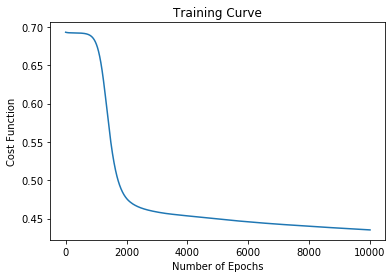

In [96]:
layers_sizes = [11, 6, 1]
activations = ["leaky_relu", "sigmoid"]
epochs = 10000
lr = 0.03
alpha = 0.01
weights = H_layer_NN(X_train, Y_train, layers_sizes, activations, epochs, lr, alpha)

### 10- Prediction on test data using weights of the H-layer Neural Network:
We have provided the full function. All you have to do is to run the below cells to check the accuracy of your model.

In [97]:
# do not change code here
def predict(X, Y, weights, activations, alpha=0.1, mode="Test"):
    """
    Inputs:
        X - Input data/examples you would like to predict
        Y - Ground truth labels corresponding to input data X
        weights - weights of the trained model
        activations - A list (of length H), where each element is a Python string representing the activation function to be used in the corresponding layer
        alpha - A hyperparameter for activation functions leaky_relu and ELU.
    Outputs:
        p -- predictions for the given dataset X
    """
    m = X.shape[1]
    p = np.zeros(m)
    AH, _ = forward_module(X, weights, activations, alpha)
    AH = np.squeeze(AH)
    pos_pred = AH > 0.5
    p[pos_pred] = 1
    print(mode + " Accuracy: "  + str(np.sum(p == Y)/m))
    return p

In [98]:
training_predictions = predict(X_train, Y_train, weights, activations, mode="Train")
test_predictions = predict(X_test, Y_test, weights, activations, mode="Test")

Train Accuracy: 0.8033333333333333
Test Accuracy: 0.8974358974358975


### 11-  Summary:
* Finally, we have implemented a custom neural network with as many layers as you want and with each layer having an activation function of your choice. Congrats on completing such a lengthy assignment (with maybe a bit more math than expected !). We feel this will help you understand important NumPy concepts like broadcasting, masking, vectorisation, etc. and also give you an insight into data preprocessing. Also, we hope this will give you a feel of how backpropgation is implemented for a fully connected neural network.

* You can always try and improve the accuracy of your model by tuning various hyperparameters like number of hidden layers, sizes of hidden layers, activation functions used in the hidden layers, learning rate, number of epochs, etc.

* As you will learn later in the course, you can also employ regularization techniques (like L2 regularization and dropout regularization) to reduce overfitting and batch normalisation (useful for a very deep neural network).